In [183]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# darkgrid, whitegrid, dark, white, ticks
# talk, paper, notebook, poster
sns.reset_defaults()
sns.set_theme(rc={'figure.dpi': 72, 'savefig.dpi': 300,
              'figure.autolayout': True})
sns.set_style('ticks')
sns.set_context('paper')

df = pd.read_csv('data/insurance.csv')


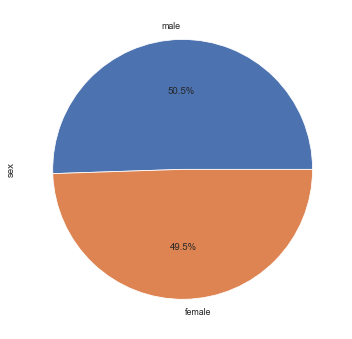

In [184]:
# Part a
df['sex'].value_counts().plot(kind='pie', autopct='%2.1f%%')
plt.savefig('P2_a.png')

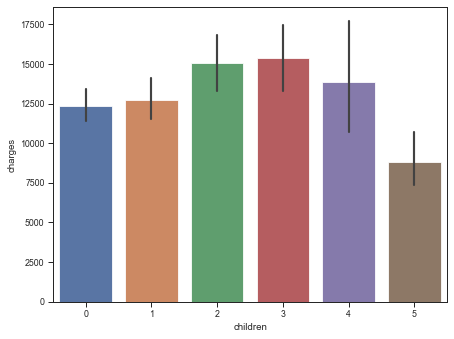

In [185]:
# Part b
sns.barplot(x=df['children'], y=df['charges'])
plt.savefig('P2_b.png')

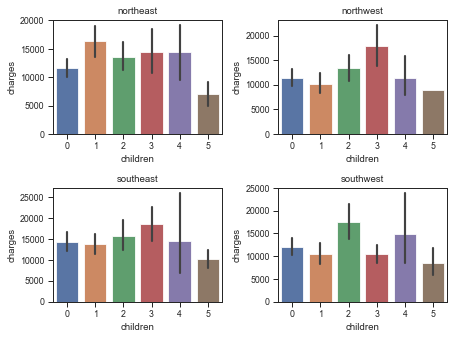

In [186]:
# Part c
gb = df.groupby('region')
fig, ax = plt.subplots(2, 2)
for key, ax in zip(gb.groups.keys(), ax.flatten()):
    dfg = gb.get_group(key)
    sns.barplot(x=dfg['children'], y=dfg['charges'], ax=ax)
    ax.set_title(key)
plt.savefig('P2_c.png')

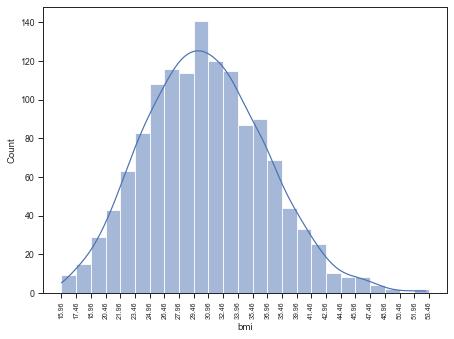

In [187]:
# Part d
ax = sns.histplot(x=df['bmi'], binwidth=1.5, kde=True)
mids = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]
edges = [rect.get_x() for rect in ax.patches] + \
    [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(edges)
ax.tick_params(axis='x', rotation=90, labelsize=7)
plt.savefig('P2_d.png')

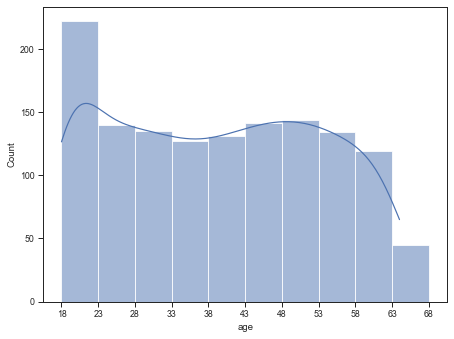

In [188]:
# Part e
ax = sns.histplot(x=df['age'], binwidth=5, kde=True)
edges = [rect.get_x() for rect in ax.patches] + \
    [ax.patches[-1].get_x() + ax.patches[-1].get_width()]
ax.set_xticks(edges)
plt.savefig('P2_e.png')

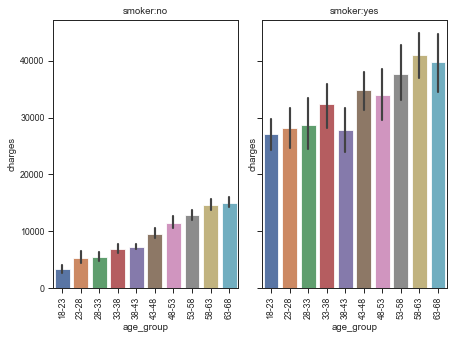

In [189]:
# Part f
gb = df.groupby('smoker')
fig, ax = plt.subplots(1, 2, sharey=True)
for key, ax in zip(gb.groups.keys(), ax.flatten()):
    dfg = gb.get_group(key)
    l = 5
    s = dfg['age'].min()
    e = dfg['age'].max()
    labels = ["{0}-{1}".format(i, i + l) for i in range(s, e, l)]
    dfg['age_group'] = pd.cut(dfg['age'], range(
        s, e + l, l), right=False, labels=labels)
    sns.barplot(x=dfg['age_group'], y=dfg['charges'], ax=ax)
    ax.set_title('smoker:' + key)
    ax.tick_params(axis='x', rotation=90)
plt.savefig('P2_f.png')

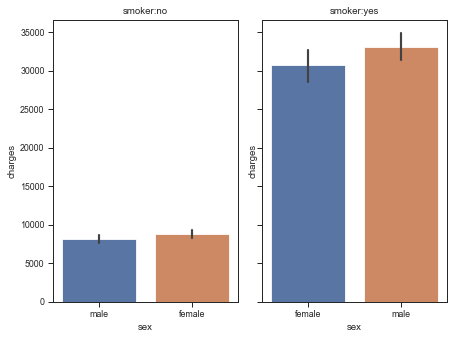

In [191]:
# Part g
gb = df.groupby('smoker')
fig, ax = plt.subplots(1, 2, sharey=True)
for key, ax in zip(gb.groups.keys(), ax.flatten()):
    dfg = gb.get_group(key)
    sns.barplot(x=dfg['sex'], y=dfg['charges'], ax=ax)
    ax.set_title('smoker:' + key)
plt.savefig('P2_g.png')

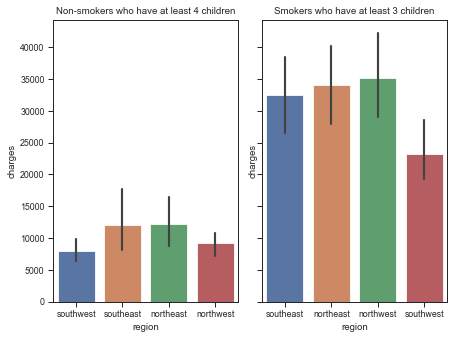

In [195]:
# Part h
gb = df.groupby('smoker')
fig, ax = plt.subplots(1, 2, sharey=True)
for key, ax in zip(gb.groups.keys(), ax.flatten()):
    dfg = gb.get_group(key)
    title = ''
    if key == 'yes':
        title = 'Smokers who have at least 3 children'
        dfg = dfg[dfg['children'] >= 3]
    else:
        title = 'Non-smokers who have at least 4 children'
        dfg = dfg[dfg['children'] >= 4]
    sns.barplot(x=dfg['region'], y=dfg['charges'], ax=ax)
    ax.set_title(title)
plt.savefig('P2_h.png')